In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [65]:
traindf=pd.read_csv(r'C:\Users\user\Downloads\dataset\train.csv')
testdf=pd.read_csv(r'C:\Users\user\Downloads\dataset\train.csv')

In [66]:
traindf.head()

,ID,Place,location,date,status,job_title,summary,positives,negatives,advice_to_mgmt,score_1,score_2,score_3,score_4,score_5,score_6,overall
0,25355,startup_4,Iaşi (Romania),"Dec 9, 2018",Current Employee,SDE1,SDE overview,Great impact. Professional people. Chance to s...,You should be on-call according to a team rota...,None.,3.0,5.0,4.0,5.0,4.0,0,3.0
1,66963,startup_6,NaN,"May 21, 2012",Current Employee,Sales Director,Experience over 17 years has been very mixed -...,one of the best reasons to work at Microsoft i...,Microsoft has become a highly political org wi...,"Take a deep, hard look at the advertising org....",3.5,NaN,3.5,4.0,1.0,4,3.0
2,50981,startup_6,NaN,"Oct 12, 2017",Current Employee,Anonymous Employee,"Lots of shiny surface, little depth",Benefits and salary are relatively competitive,Microsoft is getting in its own way of success...,Need to deliver beyond the empty words that cu...,2.0,1.0,3.0,4.0,1.0,0,3.0
3,65337,startup_6,"Vancouver, BC (Canada)","May 7, 2015",Former Employee,Finance Intern,MAP Intern,the MAP program at Microsoft is one of the bes...,No cons to report whatsoever,keep doing what you're doing,4.0,4.0,5.0,4.0,4.0,0,3.0
4,38342,startup_2,"New York, NY","Oct 9, 2017",Current Employee,Senior Software Engineer,Dear Apple,"Supportive environment, and great food.",Lack of proximity to some low-end restaurants.,Keep it up!,5.0,5.0,5.0,5.0,5.0,0,3.0


In [67]:
traindf.isna().sum()

ID                    0
Place                 0
location           8932
date                  0
status                0
job_title             0
summary              36
positives             0
negatives             0
advice_to_mgmt    10642
score_1            2557
score_2            4885
score_3            2546
score_4            2559
score_5            2801
score_6               0
overall               0
dtype: int64

In [68]:
traindf['location']=traindf['location'].fillna(traindf['location'].mode()[0])

In [69]:
traindf.isna().sum()

ID                    0
Place                 0
location              0
date                  0
status                0
job_title             0
summary              36
positives             0
negatives             0
advice_to_mgmt    10642
score_1            2557
score_2            4885
score_3            2546
score_4            2559
score_5            2801
score_6               0
overall               0
dtype: int64

In [70]:
traindf.dropna(subset=['summary'],inplace=True)
testdf.dropna(subset=['summary'],inplace=True)

In [71]:
traindf.isna().sum()

ID                    0
Place                 0
location              0
date                  0
status                0
job_title             0
summary               0
positives             0
negatives             0
advice_to_mgmt    10626
score_1            2551
score_2            4869
score_3            2540
score_4            2553
score_5            2795
score_6               0
overall               0
dtype: int64

In [72]:
traindf1=traindf.drop(['advice_to_mgmt'],axis=1)

<AxesSubplot:>

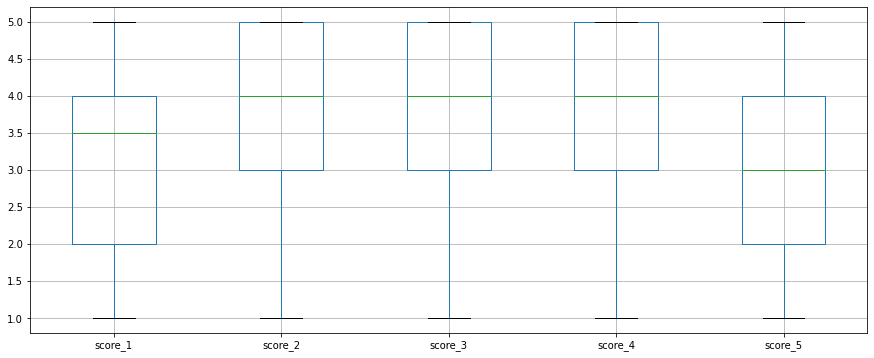

In [73]:
traindf.boxplot(column=['score_1','score_2','score_3','score_4','score_5'],figsize=(15,6))

In [74]:
traindf['score_1']=traindf['score_1'].fillna(traindf['score_1'].mean())

In [75]:
traindf['score_2']=traindf['score_2'].fillna(traindf['score_2'].mean())
traindf['score_3']=traindf['score_3'].fillna(traindf['score_3'].mean())
traindf['score_4']=traindf['score_4'].fillna(traindf['score_4'].mean())
traindf['score_5']=traindf['score_5'].fillna(traindf['score_5'].mean())

In [76]:
testdf['score_1']=testdf['score_1'].fillna(testdf['score_1'].mean())
testdf['score_2']=testdf['score_2'].fillna(testdf['score_2'].mean())
testdf['score_3']=testdf['score_3'].fillna(testdf['score_3'].mean())
testdf['score_4']=testdf['score_4'].fillna(testdf['score_4'].mean())
testdf['score_5']=testdf['score_5'].fillna(testdf['score_5'].mean())


In [77]:
traindf.isna().sum()

ID                    0
Place                 0
location              0
date                  0
status                0
job_title             0
summary               0
positives             0
negatives             0
advice_to_mgmt    10626
score_1               0
score_2               0
score_3               0
score_4               0
score_5               0
score_6               0
overall               0
dtype: int64

In [78]:
traindf=traindf.drop(['advice_to_mgmt'],axis=1)
tetsdf=testdf.drop(['advice_to_mgmt'],axis=1)

In [79]:
traindf=traindf.drop(['summary','positives','negatives'],axis=1)
testdf=testdf.drop(['summary','positives','negatives'],axis=1)

In [80]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24232 entries, 0 to 24267
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         24232 non-null  int64  
 1   Place      24232 non-null  object 
 2   location   24232 non-null  object 
 3   date       24232 non-null  object 
 4   status     24232 non-null  object 
 5   job_title  24232 non-null  object 
 6   score_1    24232 non-null  float64
 7   score_2    24232 non-null  float64
 8   score_3    24232 non-null  float64
 9   score_4    24232 non-null  float64
 10  score_5    24232 non-null  float64
 11  score_6    24232 non-null  int64  
 12  overall    24232 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 2.6+ MB


In [81]:
traindf=traindf.drop(['ID','date'],axis=1)
testdf=testdf.drop(['date'],axis=1)
testid=testdf['ID']

In [82]:
testdf=testdf.drop(['ID'],axis=1)

In [83]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24232 entries, 0 to 24267
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Place      24232 non-null  object 
 1   location   24232 non-null  object 
 2   status     24232 non-null  object 
 3   job_title  24232 non-null  object 
 4   score_1    24232 non-null  float64
 5   score_2    24232 non-null  float64
 6   score_3    24232 non-null  float64
 7   score_4    24232 non-null  float64
 8   score_5    24232 non-null  float64
 9   score_6    24232 non-null  int64  
 10  overall    24232 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 2.2+ MB


In [84]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
traindf['location']=lab_enc.fit_transform(traindf['location'])
traindf['Place']=lab_enc.fit_transform(traindf['Place'])
traindf['status']=lab_enc.fit_transform(traindf['status'])
traindf['job_title']=lab_enc.fit_transform(traindf['job_title'])




<AxesSubplot:>

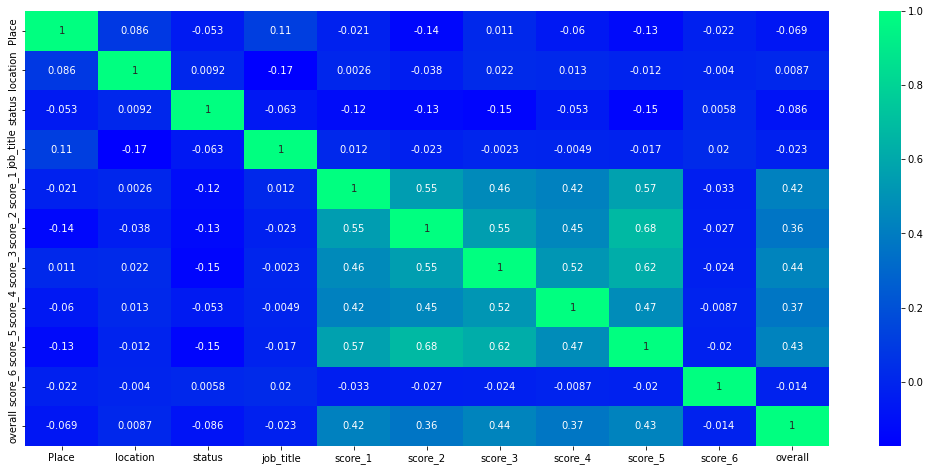

In [85]:
corr_matrix=traindf.corr()
plt.subplots(figsize=(18,8))
sns.heatmap(corr_matrix,annot=True,cmap='winter')

In [86]:
traindf=traindf.drop(['Place','location','status','job_title'],axis=1)

In [87]:
testdf=testdf.drop(['Place','location','status','job_title'],axis=1)

In [88]:
traindf=traindf.drop(['score_6'],axis=1)
testdf=testdf.drop(['score_6'],axis=1)

<AxesSubplot:>

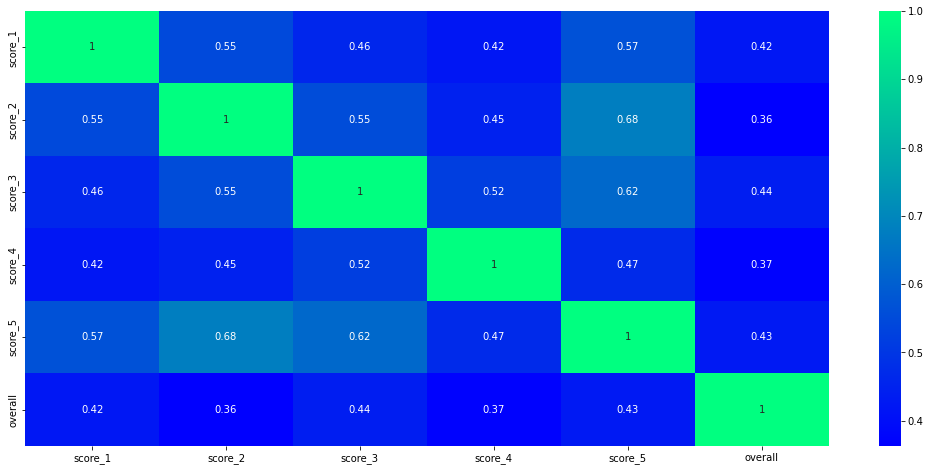

In [89]:
corr_matrix=traindf.corr()
plt.subplots(figsize=(18,8))
sns.heatmap(corr_matrix,annot=True,cmap='winter')

In [90]:
X=traindf.drop(['overall'],axis=1)
y=traindf['overall']


In [91]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=.5)

In [92]:
lr_model=LogisticRegression().fit(X_train,y_train)
y_pred_log=lr_model.predict(X_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [93]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [94]:
f1_score(y_test,y_pred_log,average='micro')

0.40582700561241336

In [97]:
testdf

,advice_to_mgmt,score_1,score_2,score_3,score_4,score_5,overall
0,None.,3.0,5.000000,4.0,5.0,4.0,3.0
1,"Take a deep, hard look at the advertising org....",3.5,3.782265,3.5,4.0,1.0,3.0
2,Need to deliver beyond the empty words that cu...,2.0,1.000000,3.0,4.0,1.0,3.0
3,keep doing what you're doing,4.0,4.000000,5.0,4.0,4.0,3.0
4,Keep it up!,5.0,5.000000,5.0,5.0,5.0,3.0
...,...,...,...,...,...,...,...
24263,Try to avoid some of the thrashing that is typ...,3.5,3.782265,5.0,3.0,5.0,5.0
24264,Could use some “human” in the HR field.,1.0,5.000000,4.0,5.0,3.0,2.0
24265,Make the job descriptions more descriptive for...,1.0,5.000000,3.0,5.0,5.0,3.0
24266,NaN,5.0,5.000000,4.0,5.0,4.0,4.0


In [98]:
testdf=testdf.drop(['advice_to_mgmt'],axis=1)

In [100]:
X1=testdf.drop(['overall'],axis=1)
y1=testdf['overall']

In [101]:
predicted_value = lr_model.predict(X1)

In [103]:
final_prediction_df = pd.DataFrame()
final_prediction_df = testdf
final_prediction_df["overall"] = predicted_value
final_prediction_df.to_csv("Final overall Prediction.csv", index=False)
final_prediction_df.head()

,score_1,score_2,score_3,score_4,score_5,overall,Predict-overall
0,3.0,5.000000,4.0,5.0,4.0,4.0,4.0
1,3.5,3.782265,3.5,4.0,1.0,3.0,3.0
2,2.0,1.000000,3.0,4.0,1.0,3.0,3.0
3,4.0,4.000000,5.0,4.0,4.0,4.0,4.0
4,5.0,5.000000,5.0,5.0,5.0,5.0,5.0


In [105]:
final_prediction_df=final_prediction_df.drop(['score_1','score_2','score_3','score_4','score_5','Predict-overall'],axis=1)
final_prediction_df

,overall
0,4.0
1,3.0
2,3.0
3,4.0
4,5.0
...,...
24263,4.0
24264,3.0
24265,3.0
24266,4.0


In [106]:
final_prediction_df1=pd.concat([testid,final_prediction_df],axis=1)
final_prediction_df1

,ID,overall
0,25355,4.0
1,66963,3.0
2,50981,3.0
3,65337,4.0
4,38342,5.0
...,...,...
24263,24890,4.0
24264,8495,3.0
24265,11384,3.0
24266,5659,4.0


In [107]:
final_prediction_df1.to_csv("Final overall Prediction1.csv", index=False)

In [108]:
final_prediction_df1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 24232 entries, 0 to 24267
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       24232 non-null  int64  
 1   overall  24232 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.1 MB


In [114]:
final_prediction_df1['overall']=final_prediction_df1['overall'].astype(int)

In [116]:
final_prediction_df1.to_csv("Final overall Prediction2.csv", index=False)